Задача №4.

Задание: для заданного набора данных постройте основные графики, входящие в этап разведочного анализа данных. В случае наличия
пропусков в данных удалите строки или колонки, содержащие пропуски. Какие графики Вы построили и почему? Какие выводы о наборе
данных Вы можете сделать на основании построенных графиков?

Набор данных: "https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine"

# Импорт библиотек, загрузка данных

In [1]:
import sys
sys.path
import pandas as pd
import numpy as np
import seaborn as sns
np.seterr(divide='ignore', invalid='ignore')
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
%matplotlib inline 

In [2]:
wine = load_wine()
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['TARGET'] = wine.target

# Общее описание датасета
### Первые пять строк датасета

In [3]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,TARGET
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


# Общее описание

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  TARGE

# Проверим количество пустых значений

In [5]:
for col_empty in df.columns:
    empty_count = df[df[col_empty].isnull()].shape[0]
    print('{} - {}'.format(col_empty, empty_count))

alcohol - 0
malic_acid - 0
ash - 0
alcalinity_of_ash - 0
magnesium - 0
total_phenols - 0
flavanoids - 0
nonflavanoid_phenols - 0
proanthocyanins - 0
color_intensity - 0
hue - 0
od280/od315_of_diluted_wines - 0
proline - 0
TARGET - 0


Пустых значений не обнаружено.

# Корреляция признаков

<Axes: >

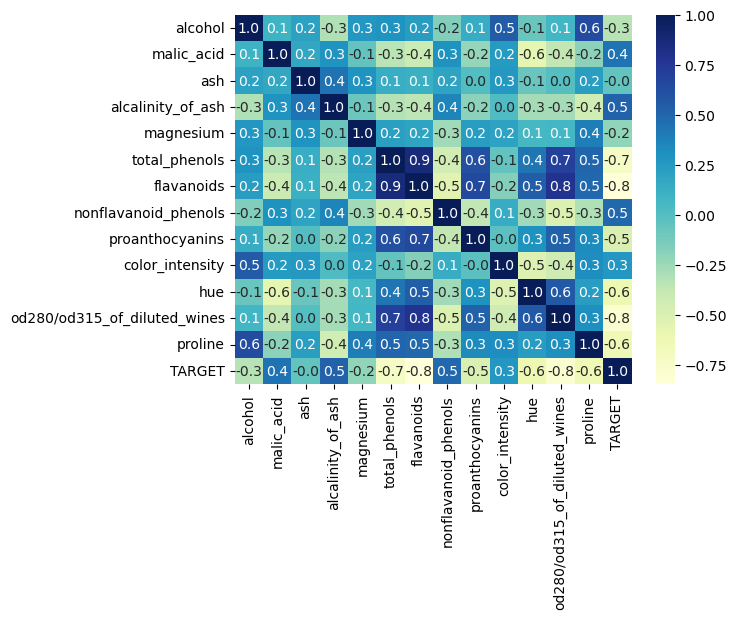

In [6]:
sns.heatmap(df.corr(), cmap='YlGnBu', annot=True, fmt='.1f')

Наиболее сильную корреляцию имеют признаки total_phenols и flavanoids. Это связано с тем, что флавониды относятся к классу полифенолов.

<Axes: >

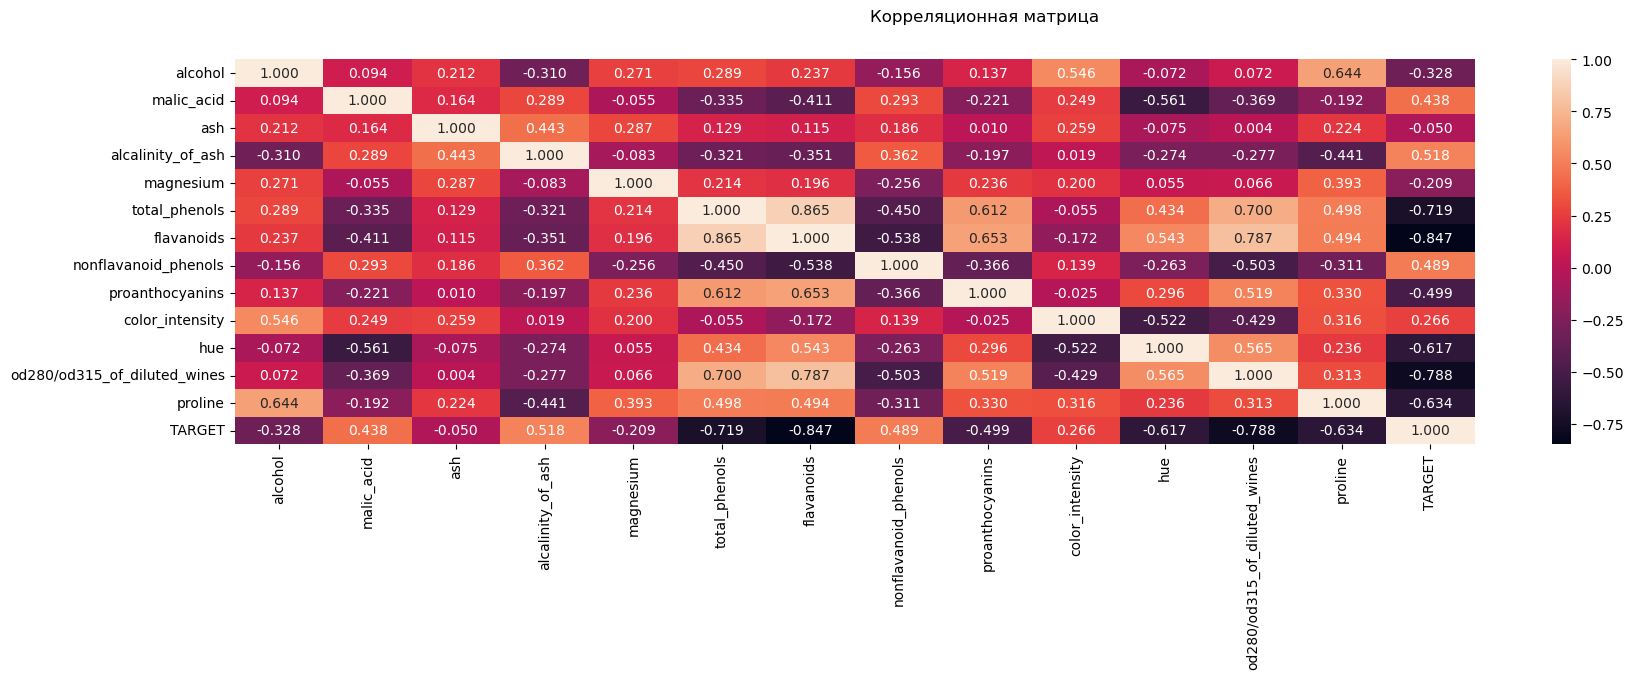

In [7]:
fig, ax = plt.subplots(1, 1, sharex='col', sharey='row', figsize=(20,5))
fig.suptitle('Корреляционная матрица')
sns.heatmap(df.corr(), ax=ax, annot=True, fmt='.3f')

C целевым признаком TARGET сильнее всего коррелируют признаки "flavanoids", "od280/od315_of_diluted_wines", "total_phenols", "hue", "proline". Соответственно, их стоит учитывать для более информативного построения модели машинного обучения.

# Визуальное исследование датасета

### Диаграмма рассеивания для признаков total_phenols и alcohol

<Axes: xlabel='alcohol', ylabel='total_phenols'>

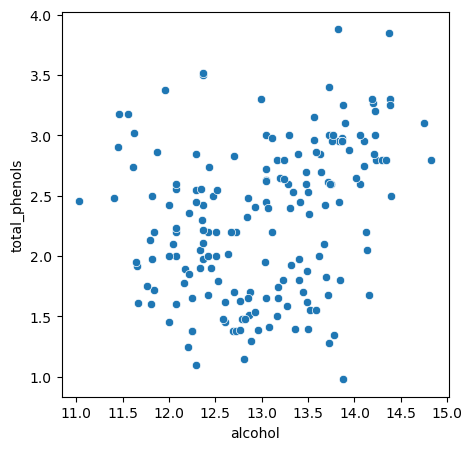

In [8]:
fig, ax = plt.subplots(figsize=(5,5)) 
sns.scatterplot(ax=ax, x='alcohol', y='total_phenols', data=df)

Данная диаграмма показывает количество фенолов в каждом проценте вина.

<Axes: xlabel='alcohol', ylabel='total_phenols'>

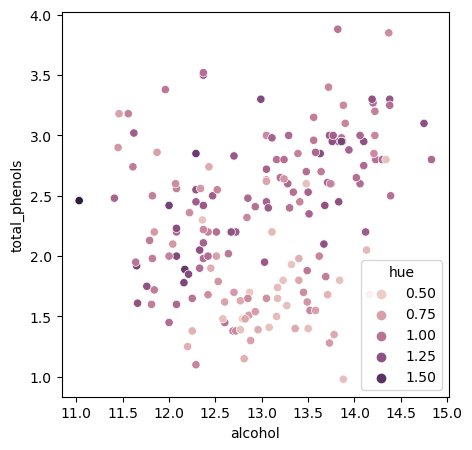

In [9]:
fig, ax = plt.subplots(figsize=(5,5)) 
sns.scatterplot(ax=ax, x='alcohol', y='total_phenols', data=df, hue='hue')

Такая же диаграмма показывает количество фенолов в каждом проценте вина, но еще добавили "hue", т.е. в каждой точке можем рассмотреть оттеннок конкретного вина. 

# Гистограмма для всех признаков

array([[<Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'malic_acid'}>,
        <Axes: title={'center': 'ash'}>,
        <Axes: title={'center': 'alcalinity_of_ash'}>],
       [<Axes: title={'center': 'magnesium'}>,
        <Axes: title={'center': 'total_phenols'}>,
        <Axes: title={'center': 'flavanoids'}>,
        <Axes: title={'center': 'nonflavanoid_phenols'}>],
       [<Axes: title={'center': 'proanthocyanins'}>,
        <Axes: title={'center': 'color_intensity'}>,
        <Axes: title={'center': 'hue'}>,
        <Axes: title={'center': 'od280/od315_of_diluted_wines'}>],
       [<Axes: title={'center': 'proline'}>,
        <Axes: title={'center': 'TARGET'}>, <Axes: >, <Axes: >]],
      dtype=object)

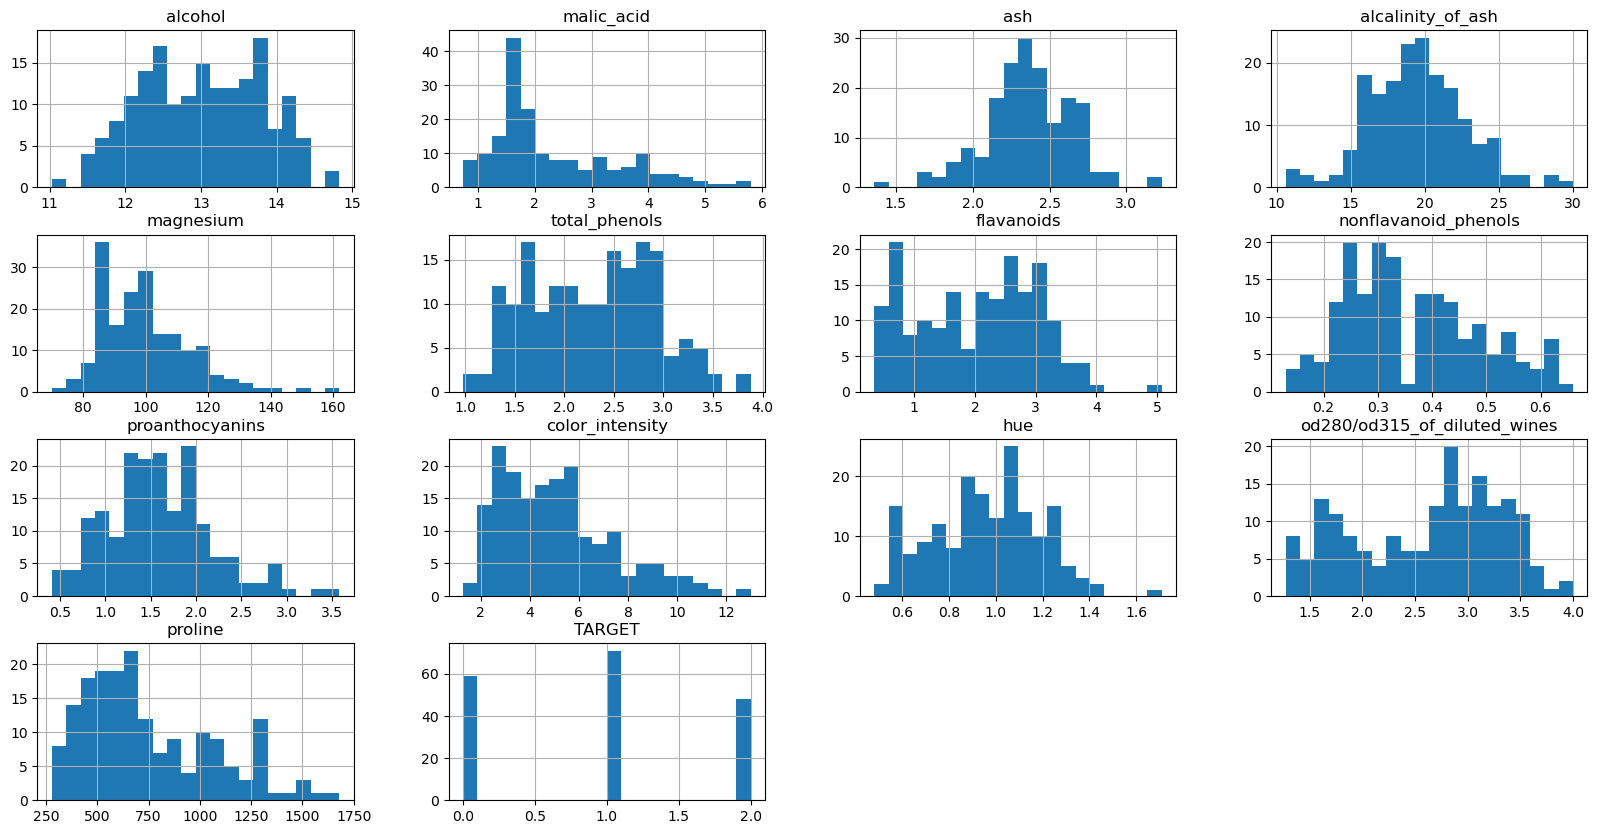

In [10]:
df.hist(bins=20, figsize = (20,10))

<Axes: xlabel='alcohol', ylabel='Count'>

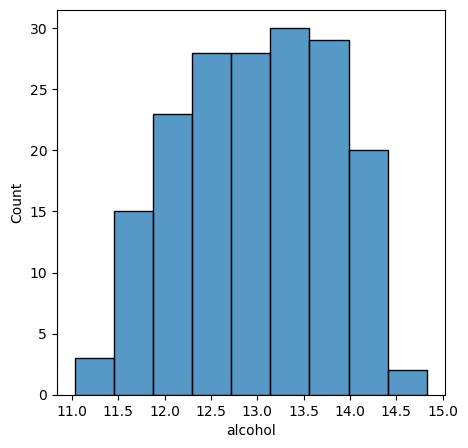

In [11]:
fig, ax = plt.subplots(figsize=(5,5)) 
sns.histplot(df['alcohol'])

Данная гистограмма показывает наибольшее количество процента алкоголя в вине.

# Jointplot

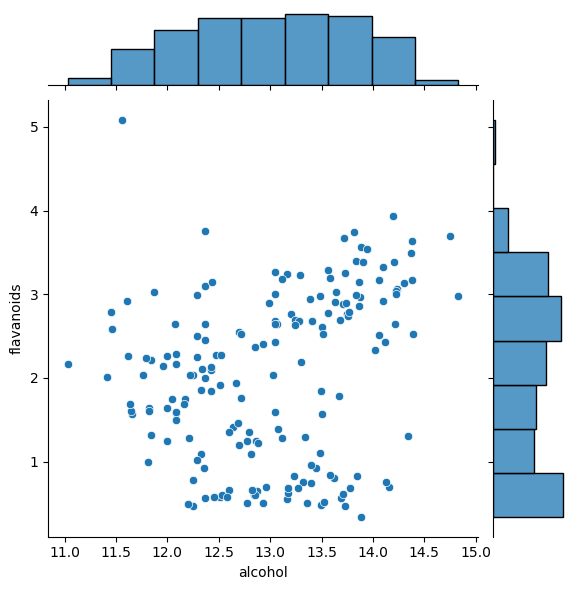

In [12]:
sns.jointplot(x='alcohol', y='flavanoids', data=df)

Комбинация гистограмм и диаграмм рассеивания.

# "Ящик с усами"
### по оси абсцисс.

<Axes: xlabel='alcohol'>

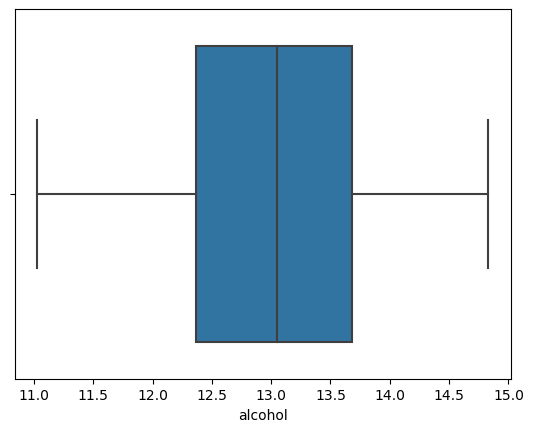

In [13]:
sns.boxplot(x=df['alcohol'])

### По оси ординат 

<Axes: ylabel='alcohol'>

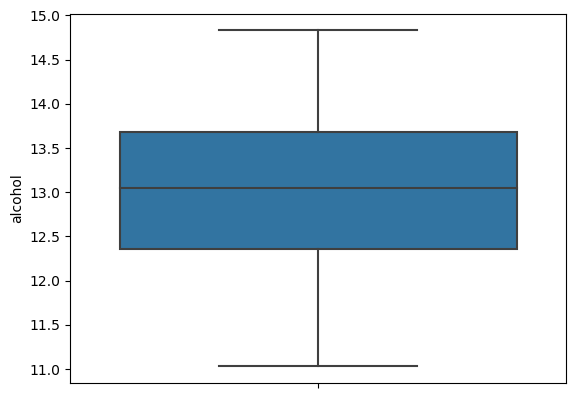

In [14]:
sns.boxplot(y=df['alcohol'])

# Скрипичная диаграмма

<Axes: xlabel='alcohol'>

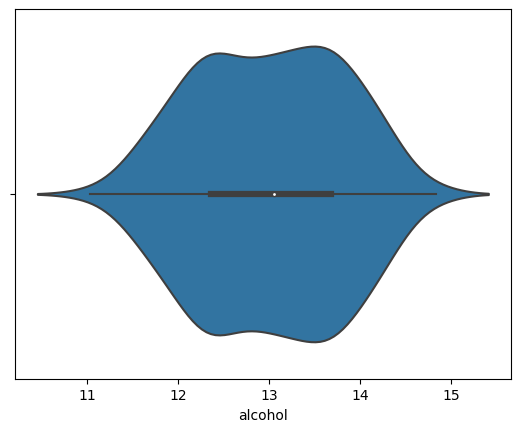

In [15]:
sns.violinplot(x=df['alcohol'])

Скрипичная диаграмма показывает распределение плотности по краям диаграммы.

<Axes: xlabel='alcohol', ylabel='Count'>

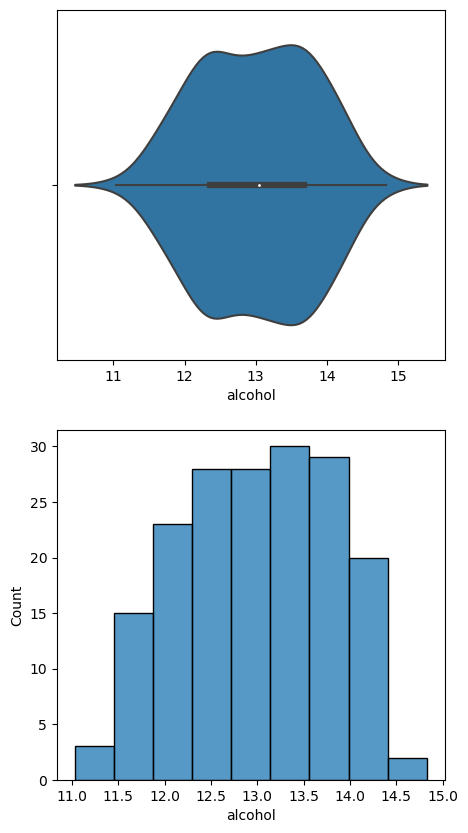

In [16]:
fig, ax = plt.subplots(2, 1, figsize=(5,10))
sns.violinplot(ax=ax[0], x=df['alcohol'])
sns.histplot(df['alcohol'])

Из приведенных графиков видно, что скрипичная диаграмма действительно показывает распределение плотности.